In [1]:
import os
import pandas as pd
from umap import UMAP
import seaborn as sns
from dataset.dataset_representation import process_dataset

import matplotlib.pyplot as plt

/home/roberto_olayo/miniconda3/envs/mole/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
OUTPUT_DIR = "representation_dir"

## Gathering the representation for BBBP

This an example of gathering the pre-trained representation from MolE where $z \in \mathbb{R}^{2000}$ and $\lambda = 0.005$

In [3]:
bbbp_split, bbbp_mole_2k = process_dataset(dataset_path="./data/benchmark_data/bbbp/BBBP.csv",
                                           # Parameters for splitting
                                           dataset_split=True,
                                           split_approach="scaffold",
                                           validation_proportion=0.1,
                                           test_proportion=0.1,
                                           
                                           # Details about pre-trained representation
                                           pretrain_architecture="gin_concat",
                                           pretrained_model="gin_concat_R1000_E2000")

About to generate scaffolds
About to sort in scaffold sets
Representation Dimension (1000) - Embedding dimension (2000)
./ckpt/gin_concat_R1000_E2000/checkpoints/model.pth
x_embedding1.weight
x_embedding2.weight
gnns.0.mlp.0.weight
gnns.0.mlp.0.bias
gnns.0.mlp.1.weight
gnns.0.mlp.1.bias
gnns.0.mlp.1.running_mean
gnns.0.mlp.1.running_var
gnns.0.mlp.1.num_batches_tracked
gnns.0.mlp.3.weight
gnns.0.mlp.3.bias
gnns.0.edge_embedding1.weight
gnns.0.edge_embedding2.weight
gnns.1.mlp.0.weight
gnns.1.mlp.0.bias
gnns.1.mlp.1.weight
gnns.1.mlp.1.bias
gnns.1.mlp.1.running_mean
gnns.1.mlp.1.running_var
gnns.1.mlp.1.num_batches_tracked
gnns.1.mlp.3.weight
gnns.1.mlp.3.bias
gnns.1.edge_embedding1.weight
gnns.1.edge_embedding2.weight
gnns.2.mlp.0.weight
gnns.2.mlp.0.bias
gnns.2.mlp.1.weight
gnns.2.mlp.1.bias
gnns.2.mlp.1.running_mean
gnns.2.mlp.1.running_var
gnns.2.mlp.1.num_batches_tracked
gnns.2.mlp.3.weight
gnns.2.mlp.3.bias
gnns.2.edge_embedding1.weight
gnns.2.edge_embedding2.weight
gnns.3.mlp.0.w

We can do the same for $z \in \mathbb{R}^{8000}$ and $\lambda = 0.0001$

In [4]:
bbbp_mole_8k = process_dataset(dataset_path="./data/benchmark_data/bbbp/BBBP.csv",
                                  # Parameters for splitting
                                  dataset_split=False,
                                           
                                  # Details about pre-trained representation
                                  pretrain_architecture="gin_concat",
                                  pretrained_model="gin_concat_R1000_E8000_lambda0.0001")


Representation Dimension (1000) - Embedding dimension (8000)
./ckpt/gin_concat_R1000_E8000_lambda0.0001/checkpoints/model.pth
x_embedding1.weight
x_embedding2.weight
gnns.0.mlp.0.weight
gnns.0.mlp.0.bias
gnns.0.mlp.1.weight
gnns.0.mlp.1.bias
gnns.0.mlp.1.running_mean
gnns.0.mlp.1.running_var
gnns.0.mlp.1.num_batches_tracked
gnns.0.mlp.3.weight
gnns.0.mlp.3.bias
gnns.0.edge_embedding1.weight
gnns.0.edge_embedding2.weight
gnns.1.mlp.0.weight
gnns.1.mlp.0.bias
gnns.1.mlp.1.weight
gnns.1.mlp.1.bias
gnns.1.mlp.1.running_mean
gnns.1.mlp.1.running_var
gnns.1.mlp.1.num_batches_tracked
gnns.1.mlp.3.weight
gnns.1.mlp.3.bias
gnns.1.edge_embedding1.weight
gnns.1.edge_embedding2.weight
gnns.2.mlp.0.weight
gnns.2.mlp.0.bias
gnns.2.mlp.1.weight
gnns.2.mlp.1.bias
gnns.2.mlp.1.running_mean
gnns.2.mlp.1.running_var
gnns.2.mlp.1.num_batches_tracked
gnns.2.mlp.3.weight
gnns.2.mlp.3.bias
gnns.2.edge_embedding1.weight
gnns.2.edge_embedding2.weight
gnns.3.mlp.0.weight
gnns.3.mlp.0.bias
gnns.3.mlp.1.weight
gn

We can also gather ECFP4 representation

In [5]:
bbbp_mole_ecfp4 = process_dataset(dataset_path="./data/benchmark_data/bbbp/BBBP.csv",
                                  # Parameters for splitting
                                  dataset_split=False,
                                           
                                  # Details about pre-trained representation
                                  pretrained_model="ECFP4")


In [6]:
os.makedirs(os.path.join(OUTPUT_DIR, "bbbp"), exist_ok=True)
bbbp_split.to_csv(os.path.join(OUTPUT_DIR, "bbbp", "bbb_split.csv"), index=False)

bbbp_mole_2k.to_csv(os.path.join(OUTPUT_DIR, "bbbp", "bbbp_mole_2k.csv"), index=True)
bbbp_mole_8k.to_csv(os.path.join(OUTPUT_DIR, "bbbp", "bbbp_mole_8kle3.csv"), index=True)
bbbp_mole_ecfp4.to_csv(os.path.join(OUTPUT_DIR, "bbbp", "bbbp_mole_ecfp4.csv"), index=True)

In [7]:
bbbp_split_classes = bbbp_split[["chem_id", "p_np"]].set_index("chem_id")

## Low Dimensional representation

/home/roberto_olayo/miniconda3/envs/mole/lib/python3.8/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/roberto_olayo/miniconda3/envs/mole/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/roberto_olayo/miniconda3/envs/mole/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


<Axes: xlabel='umap1', ylabel='umap2'>

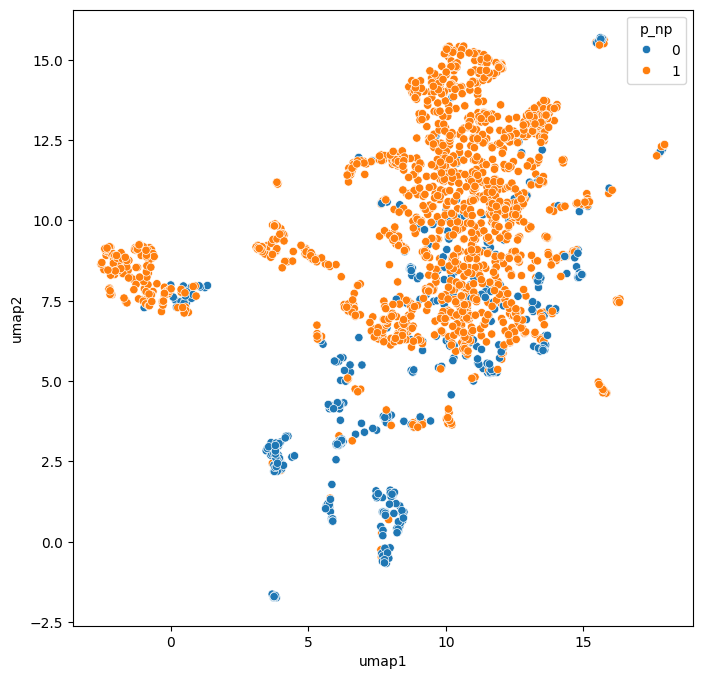

In [8]:
reducer = UMAP(random_state=42, n_components=2, n_neighbors=10, min_dist=0.3, metric="jaccard")

embedding = reducer.fit_transform(bbbp_mole_ecfp4.values)

ecfp4_umap = pd.DataFrame(data = embedding,
                          columns = ['umap1', 'umap2'], 
                          index = bbbp_mole_ecfp4.index)
                          
ecfp4_umap = ecfp4_umap.join(bbbp_split_classes)                          
ecfp4_umap.head()

plt.figure(figsize=(8, 8))
sns.scatterplot(data=ecfp4_umap, x="umap1", y="umap2", hue="p_np")

/home/roberto_olayo/miniconda3/envs/mole/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: xlabel='umap1', ylabel='umap2'>

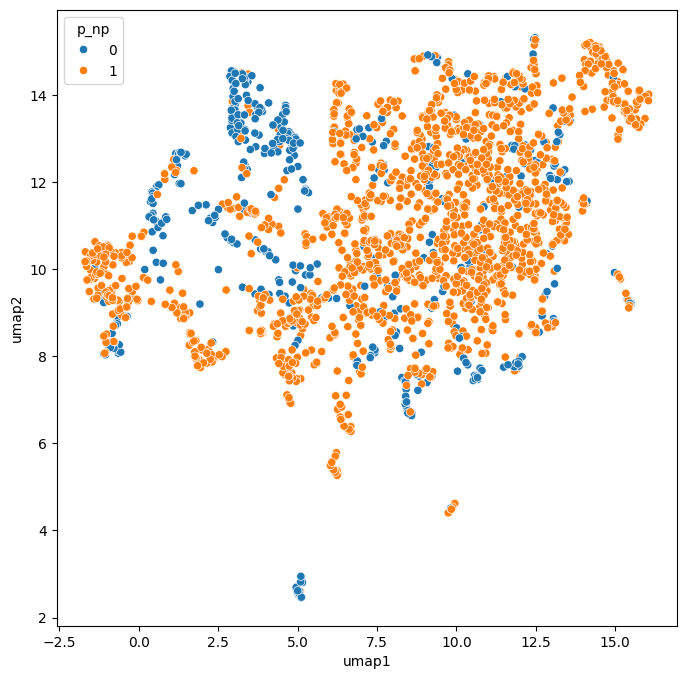

In [9]:

reducer = UMAP(random_state=42, n_components=2, n_neighbors=10, min_dist=0.3, metric="cosine")

embedding = reducer.fit_transform(bbbp_mole_2k.values)

gbt2k_umap = pd.DataFrame(data = embedding,
                          columns = ['umap1', 'umap2'], 
                          index = bbbp_mole_2k.index)
                          
gbt2k_umap = gbt2k_umap.join(bbbp_split_classes)                          
gbt2k_umap.head()

plt.figure(figsize=(8, 8))
sns.scatterplot(data=gbt2k_umap, x="umap1", y="umap2", hue="p_np")

In [10]:
ecfp4_umap["representation"] = "ECFP4"
ecfp4_umap["dataset"] = "BBBP"
ecfp4_umap = ecfp4_umap.reset_index()

gbt2k_umap["representation"] = "MolE"
gbt2k_umap["dataset"] = "BBBP"
gbt2k_umap = gbt2k_umap.reset_index()

bbbp_umap = pd.concat([ecfp4_umap, gbt2k_umap])
bbbp_umap.rename(columns={"p_np": "Class"}, inplace=True)

bbbp_umap.head()

,index,umap1,umap2,Class,representation,dataset
0,chem_0,12.080063,6.027559,1,ECFP4,BBBP
1,chem_1,9.881021,6.511940,1,ECFP4,BBBP
2,chem_2,15.757219,15.623496,1,ECFP4,BBBP
3,chem_3,11.121749,9.660881,1,ECFP4,BBBP
4,chem_4,4.248665,3.284887,1,ECFP4,BBBP


In [ ]:
## You can also use CPU

In [14]:
bace_mole_8k = process_dataset(dataset_path="./data/benchmark_data/bace/bace.csv",
                                  # Parameters for splitting
                                  dataset_split=False,
                                           
                                  # Details about pre-trained representation
                                  pretrain_architecture="gin_concat",
                                  pretrained_model="gin_concat_R1000_E8000_lambda0.0001",
                                  device="cpu")

Representation Dimension (1000) - Embedding dimension (8000)
./ckpt/gin_concat_R1000_E8000_lambda0.0001/checkpoints/model.pth
x_embedding1.weight
x_embedding2.weight
gnns.0.mlp.0.weight
gnns.0.mlp.0.bias
gnns.0.mlp.1.weight
gnns.0.mlp.1.bias
gnns.0.mlp.1.running_mean
gnns.0.mlp.1.running_var
gnns.0.mlp.1.num_batches_tracked
gnns.0.mlp.3.weight
gnns.0.mlp.3.bias
gnns.0.edge_embedding1.weight
gnns.0.edge_embedding2.weight
gnns.1.mlp.0.weight
gnns.1.mlp.0.bias
gnns.1.mlp.1.weight
gnns.1.mlp.1.bias
gnns.1.mlp.1.running_mean
gnns.1.mlp.1.running_var
gnns.1.mlp.1.num_batches_tracked
gnns.1.mlp.3.weight
gnns.1.mlp.3.bias
gnns.1.edge_embedding1.weight
gnns.1.edge_embedding2.weight
gnns.2.mlp.0.weight
gnns.2.mlp.0.bias
gnns.2.mlp.1.weight
gnns.2.mlp.1.bias
gnns.2.mlp.1.running_mean
gnns.2.mlp.1.running_var
gnns.2.mlp.1.num_batches_tracked
gnns.2.mlp.3.weight
gnns.2.mlp.3.bias
gnns.2.edge_embedding1.weight
gnns.2.edge_embedding2.weight
gnns.3.mlp.0.weight
gnns.3.mlp.0.bias
gnns.3.mlp.1.weight
gn